In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from us import states
from census import Census
# Import Census key
from config import census_key

# Census API Key
c = Census(census_key, year=2018)

#### Uploading MLB Beer Price data

In [73]:
# import MLB Beer price data

# path data files
beer_data_path = "MLB Beer Prices.csv"

# Read the MLB data
mlb_beer_price_df = pd.read_csv(beer_data_path)


mlb_beer_price_df.head()

,Year,Team,Nickname,City,Price,Size,Price per Ounce,Wins,Losses,Average # of drinks per game,Average Spent per Game (USD)
0,2013,Arizona Diamondbacks,Diamondbacks,Arizona,4.00,14,0.29,Na,NaN,NaN,NaN
1,2013,Atlanta Braves,Braves,Atlanta,7.25,16,0.45,Na,NaN,NaN,NaN
2,2013,Baltimore Orioles,Orioles,Baltimore,6.75,18,0.38,Na,NaN,NaN,NaN
3,2013,Boston Red Sox,Red Sox,Boston,7.25,12,0.60,Na,NaN,NaN,NaN
4,2013,Chicago Cubs,Cubs,Chicago,7.25,16,0.45,Na,NaN,NaN,NaN


In [80]:
# Cleaning data 
# Filter for 2018 only
mlb_beer_price_df = mlb_beer_price_df[mlb_beer_price_df['Year']==2018]

# drop all instances of 'MLB Average' - it contains a Nan value
clean_mlb_beer_df = mlb_beer_price_df.dropna()
clean_mlb_beer_df.head(50)

,Year,Team,Nickname,City,Price,Size,Price per Ounce,Wins,Losses,Average # of drinks per game,Average Spent per Game (USD)
124,2018,Arizona Diamondbacks,Diamondbacks,Arizona,4.00,14,0.29,82,80,3.4,$29.00
125,2018,Atlanta Braves,Braves,Atlanta,5.00,12,0.42,90,72,4.0,$32.00
126,2018,Baltimore Orioles,Orioles,Baltimore,4.00,12,0.33,47,115,3.5,$31.00
127,2018,Boston Red Sox,Red Sox,Boston,8.00,12,0.67,95,68,3.2,$33.00
128,2018,Chicago Cubs,Cubs,Chicago,9.00,20,0.45,108,54,3.4,$45.00
129,2018,Chicago White Sox,White Sox,Chicago,7.00,16,0.44,62,100,4.2,$46.00
130,2018,Cincinnati Reds,Reds,Cincinnati,6.25,14,0.45,67,95,3.8,$40.00
131,2018,Cleveland Indians,Indians,Cleveland,5.00,12,0.42,91,71,3.8,$35.00
132,2018,Colorado Rockies,Rockies,Colorado,3.00,12,0.25,91,72,3.6,$40.00
133,2018,Detroit Tigers,Tigers,Detroit,5.00,12,0.42,64,98,3.5,$35.00


#### Uploading Zip to City/State csv

In [29]:
# path data files
zip_city_state = "Zip-Codes-to-City-County-State-2020.csv"

# # Read the zipcode data
zip_city_state_df = pd.read_csv(zip_city_state,dtype=str)
zip_city_state_df = zip_city_state_df.rename(columns={'zip': 'Zip Code'})
zip_city_state_df.head()

,Zip Code,primary_city,state,country,county,lat,lng
0,00501,Holtsville,NY,US,NaN,NaN,NaN
1,00544,Holtsville,NY,US,NaN,NaN,NaN
2,00601,Adjuntas,PR,US,Adjuntas,18.18004,-66.75218
3,00602,Aguada,PR,US,Aguada,18.36073,-67.17517
4,00603,Aguadilla,PR,US,Aguadilla,18.45439,-67.12202


#### Uploading Census data

In [47]:
# US Median Household Income by Zip Code
# Request to Census.gov
census_data_zip = c.acs5.get(("B01003_001E", "B21004_001E"), {"for": "zip code tabulation area:*"})

# Convert to DataFrame
census_pd_zip = pd.DataFrame(census_data_zip)

# Column Reordering
census_pd_zip = census_pd_zip.rename(columns={"B01003_001E": "Population", "B21004_001E": "Median Income", "zip code tabulation area": "Zip Code"})

census_pd_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Population     33120 non-null  float64
 1   Median Income  33085 non-null  float64
 2   state          33120 non-null  object 
 3   Zip Code       33120 non-null  object 
dtypes: float64(2), object(2)
memory usage: 1.0+ MB


#### Merge (Left Join) Census data with Zip to state city 

In [48]:
# left merge Census data with zip/city data
result = pd.merge(census_pd_zip, zip_city_state_df, on="Zip Code")

# clean up results for what's needed. 
clean_cencus_df = result[['primary_city','state_y','Median Income']].dropna()
clean_cencus_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33085 entries, 0 to 33084
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   primary_city   33085 non-null  object 
 1   state_y        33085 non-null  object 
 2   Median Income  33085 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.0+ MB


In [65]:
# keep cities with Median income greater than 0
clean_cencus_df = clean_cencus_df[clean_cencus_df['Median Income']>0]
clean_cencus_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31763 entries, 0 to 33084
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   primary_city   31763 non-null  object 
 1   state_y        31763 non-null  object 
 2   Median Income  31763 non-null  float64
dtypes: float64(1), object(2)
memory usage: 992.6+ KB


In [89]:
# group median income by state 
income_by_state = clean_cencus_df.groupby(['state_y','primary_city']).mean()[['Median Income']].reset_index()
income_by_state = income_by_state.rename(columns={'primary_city': 'City', 'state_y': 'State Abbreviation'})
income_by_state.head()

,State Abbreviation,City,Median Income
0,AK,Adak,27222.0
1,AK,Akiachak,11979.0
2,AK,Akiak,14931.0
3,AK,Akutan,28438.0
4,AK,Alakanuk,11389.0


In [121]:
# checking the data
# income_by_state[income_by_state['City']=='Saint Louis']

# read in cvs with cleaner MLB data
mlb_Stateadded = "MLB_Data_Stateadded.csv"

# Read the MLB data
cleaner_MLB_df = pd.read_csv(mlb_Stateadded)
cleaner_MLB_df = cleaner_MLB_df[cleaner_MLB_df['City']!='Toronto'] #dropping toronto as there wont be any income data
# cleaner_MLB_df.head()

#### Merge MLB data with Income Data

In [152]:
# Merge all data for final output - for anlaysis
final_result = pd.merge(cleaner_MLB_df, income_by_state,how='left', on=['City','State Abbreviation'])
# final_results

final_result['Win/Loss Ratio'] = final_result['Wins']/final_result['Losses']
final_result

,Year,Team,Nickname,City,State,State Abbreviation,Price,Size,Price per Ounce,Wins,Losses,Average # of drinks per game,Average Spent per Game (USD),Median Income,Win/Loss Ratio
0,2018,Arizona Diamondbacks,Diamondbacks,Phoenix,Arizona,AZ,4.00,14,0.29,82,80,3.4,$29.00,32395.571429,1.025000
1,2018,Atlanta Braves,Braves,Atlanta,Georgia,GA,5.00,12,0.42,90,72,4.0,$32.00,37456.447368,1.250000
2,2018,Baltimore Orioles,Orioles,Baltimore,Maryland,MD,4.00,12,0.33,47,115,3.5,$31.00,29407.681818,0.408696
3,2018,Boston Red Sox,Red Sox,Boston,Massachusetts,MA,8.00,12,0.67,95,68,3.2,$33.00,52989.133333,1.397059
4,2018,Chicago Cubs,Cubs,Chicago,Illinois,IL,9.00,20,0.45,108,54,3.4,$45.00,39540.535714,2.000000
5,2018,Chicago White Sox,White Sox,Chicago,Illinois,IL,7.00,16,0.44,62,100,4.2,$46.00,39540.535714,0.620000
6,2018,Cincinnati Reds,Reds,Cincinnati,Ohio,OH,6.25,14,0.45,67,95,3.8,$40.00,31666.822222,0.705263
7,2018,Cleveland Indians,Indians,Cleveland,Ohio,OH,5.00,12,0.42,91,71,3.8,$35.00,23325.758621,1.281690
8,2018,Colorado Rockies,Rockies,Denver,Colorado,CO,3.00,12,0.25,91,72,3.6,$40.00,38463.447368,1.263889
9,2018,Detroit Tigers,Tigers,Detroit,Michigan,MI,5.00,12,0.42,64,98,3.5,$35.00,19164.000000,0.653061


#### Analysis - Income by Price per beer correlation

Create a scatter plot, add a regression line and calculate r-squared value. 

In [167]:
# a quick histogram of the data being analyzed
# hist_ppo = ppo_income['Price per Ounce'].plot.hist()

In [168]:
# a quick histogram of the data being analyzed
# hist_income = ppo_income['Median Income'].plot.hist()

y = 68170.71x + 7898.08
The r-valued is: 0.27351944841525855


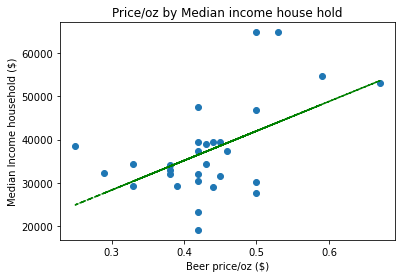

In [148]:
# Testing correlation between income and price of beer per oz
ppo_income = final_result[['Price per Ounce','Median Income']]

# calculate linear regression
data_regress = linregress(ppo_income.iloc[:,0],ppo_income.iloc[:,1])

# unpack the regression 
(slope, intercept, rvalue, pvalue, stderr) = data_regress

# using the regression formula (y = mx + b) pass the unpacked values into a variable
regression_value = ppo_income.iloc[:,0]*slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(equation)

# scatter plot
plt.plot(ppo_income.iloc[:,0],regression_value,color='green', linestyle='dashed')
plt.scatter(ppo_income['Price per Ounce'],ppo_income['Median Income'])
# plt.annotate(equation,(0,0),fontsize=15,color="red")

# labels for plot
plt.title("Price/oz by Median income house hold")
plt.ylabel("Median Income household ($)")
plt.xlabel("Beer price/oz ($)")
print(f"The r-valued is: {rvalue**2}")

There appears to be a positive correlation between the median income house hold (city) and the price of beer (per oz); although not a very strong one. R-squared value tells us that about 27% of the data is centered around the mean. 

#### Analysis - Record vs Beer consumption

Create a scatter plot, add a regression line and calculate r-squared value.

In [169]:
# a quick histogram of the data being analyzed
# hist_record = final_result['Win/Loss Ratio'].plot.hist()

In [170]:
# a quick histogram of the data being analyzed
# hist_record = final_result['Average # of drinks per game'].plot.hist()

y = -0.31x + 3.59
The r-valued is: 0.06923949811410202


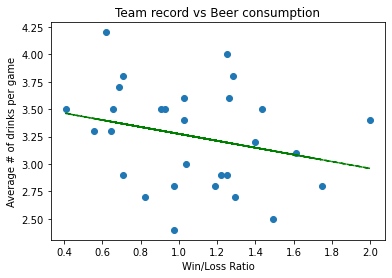

In [151]:
# Testing correlation between Win/Loss ratio and # of drinks per game
record_beer = final_result[['Win/Loss Ratio','Average # of drinks per game']]

# calculate linear regression
data_regress = linregress(record_beer.iloc[:,0],record_beer.iloc[:,1])

# unpack the regression 
(slope, intercept, rvalue, pvalue, stderr) = data_regress

# using the regression formula (y = mx + b) pass the unpacked values into a variable
regression_value = record_beer.iloc[:,0]*slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(equation)

# scatter plot
plt.plot(record_beer.iloc[:,0],regression_value,color='green', linestyle='dashed')
plt.scatter(record_beer['Win/Loss Ratio'],record_beer['Average # of drinks per game'])
# plt.annotate(equation,(0,0),fontsize=15,color="red")

# labels for plot
plt.title("Team record vs Beer consumption")
plt.ylabel("Average # of drinks per game")
plt.xlabel("Win/Loss Ratio")
print(f"The r-valued is: {rvalue**2}")

This scatter plot shows a negative correlation between the average price of drinks and a team's record. The correlation is NOT strong. 